<a href="https://colab.research.google.com/github/hussain0048/Projects-/blob/master/Building_a_Real_Time_Emotion_Detection_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Building a Real Time Emotion Detection with Python**
# **📚Introduction:**

Detecting real-time emotion of the person with a camera input is one of the advanced features in the machine learning process. The detection of emotion of a person using a camera is useful for various research and analytics purposes. The detection of emotion is made by using the machine learning concept. You can use the trained dataset to detect the emotion of the human being. For detecting the different emotions, first you need to train those different emotions, or you can use a dataset already available on the internet. In this article, we will discuss creating a Python program to detect real-time emotion of a human being using the camera '[1].

# **📚Table of Content**



*  **Intalling Dependencies**
*  **Dataset**
*  **Import Library**
*   **Load Dataset**
*   **Data Description**
*   **Data Spliting**
*   **Data Normalization**
*   **Design CNN**
*   **Model Training**



# **📚1-Installing Dependencies**

In [1]:
!pip install opencv-python

In [2]:
!pip install tensor flow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 7.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
!pip install numpy

In [ ]:
!pip install pandas

In [4]:
!pip install keras

In [5]:
!pip install adam

In [ ]:
!pip install kwargs

ERROR: Could not find a version that satisfies the requirement kwargs (from versions: none)
ERROR: No matching distribution found for kwargs


In [6]:
!pip install cinit

  Preparing metadata (setup.py) ... done
  Created wheel for cinit: filename=cinit-0.1.0-py3-none-any.whl size=2468 sha256=b10d637da217a7a4cefb435c9c1f4b88a5734f2ada117c6c46f741bfdc316fa7
  Stored in directory: /root/.cache/pip/wheels/69/14/5f/46a9933c5e45a0eecc335d133de4549279521c519c16e64a89
Successfully built cinit


# 1 **📚Dataset**#

For training purposes, I use the predefined un trained dataset CSV file as my main input for my input for training the machine. You can use the code given below for training the machine using the dataset. Before that, you need to ensure that all required files in the same repository where the program presents otherwise it will through some error. You can download the data set by clicking here.

# 2 - **📚Import library**


In [7]:
import sys, os
import pandas as pd
import numpy as np

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
#from keras.utils import np_utils

from keras.utils import to_categorical
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

#2 - **📚Load Dataset** #
The both training and evaluation operations would be handled with Fec2013 dataset. Compressed version of the dataset takes 92 MB space whereas uncompressed version takes 295 MB space. There are 28K training and 3K testing images in the dataset. Each image was stored as 48×48 pixel. The pure dataset consists of image pixels (48×48=2304 values), emotion of each image and usage type (as train or test instance)[2].

In [22]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [23]:
df=pd.read_csv('/content/gdrive/MyDrive/Datasets (1)/Emotion Detection/fer2013.csv')

#**📚2-Data Description**

In [11]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB
None


In [13]:
print(df["Usage"].value_counts())

Usage
Training       28709
PublicTest      3589
PrivateTest     3589
Name: count, dtype: int64


In [14]:
print(df.head())

   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training


In [ ]:
df.shape

# 📚3- **Data Spliting**

In [15]:
X_train,train_y,X_test,test_y=[],[],[],[]

for index, row in df.iterrows():
    val=row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
           X_train.append(np.array(val,'float32'))
           train_y.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
           X_test.append(np.array(val,'float32'))
           test_y.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")

In [16]:
num_features = 64
num_labels = 7
batch_size = 64
epochs = 30
width, height = 48, 48

In [17]:
X_train = np.array(X_train,'float32')
train_y = np.array(train_y,'float32')
X_test = np.array(X_test,'float32')
test_y = np.array(test_y,'float32')

In [ ]:
#train_y=np_utils.to_categorical(train_y, num_classes=num_labels)
#test_y=np_utils.to_categorical(test_y, num_classes=num_labels)

In [18]:
train_y=to_categorical(train_y, num_classes=num_labels)
test_y=to_categorical(test_y, num_classes=num_labels)

#📚4- **Normalizing data between 0 and 1**

In [19]:
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)
X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

# 📚5- **Designing the CNN**


##5.1- **1st convolution layer**

In [20]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))
model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

## 5.2 - **2nd Convolution Layer**

In [21]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

## 5.3- **3rd Convolution Layer**

In [24]:
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Flatten())

##5.4-  **Fully connected neural network**

In [25]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_labels, activation='softmax'))
# model.summary()

#**📚6-Training**

##**6.1 Method1 Generator [2]**
We can train the network. To complete the training in less time, I prefer to implement learning with randomly selected trainset instances. That is the reason why train and fit generator used. Also, loss function would be cross entropy because the task is multi class classification [2]

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import keras
import keras.utils
from keras import utils as np_utils

In [27]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator()
train_generator = gen.flow(X_train, train_y, batch_size=batch_size)
model.compile(loss='categorical_crossentropy'
, optimizer=keras.optimizers.Adam()
, metrics=['accuracy']
)
model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs)

Epoch 1/30


<ipython-input-27-8022c85936fe>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs)


64/64 [==============================] - 10s 22ms/step - loss: 1.8286 - accuracy: 0.2419
Epoch 2/30
64/64 [==============================] - 1s 22ms/step - loss: 1.7949 - accuracy: 0.2432
Epoch 3/30
64/64 [==============================] - 1s 22ms/step - loss: 1.7630 - accuracy: 0.2727
Epoch 4/30
64/64 [==============================] - 2s 35ms/step - loss: 1.7156 - accuracy: 0.3043
Epoch 5/30
64/64 [==============================] - 1s 20ms/step - loss: 1.6838 - accuracy: 0.3145
Epoch 6/30
64/64 [==============================] - 1s 21ms/step - loss: 1.6593 - accuracy: 0.3303
Epoch 7/30
64/64 [==============================] - 1s 22ms/step - loss: 1.6142 - accuracy: 0.3538
Epoch 8/30
64/64 [==============================] - 1s 22ms/step - loss: 1.5628 - accuracy: 0.3806
Epoch 9/30
64/64 [==============================] - 1s 21ms/step - loss: 1.5373 - accuracy: 0.3953
Epoch 10/30
64/64 [==============================] - 1s 22ms/step - loss: 1.5051 - accuracy: 0.4099
Epoch 11/30
64/64 [

##6.2-**Method 2 Compliling the model**

In [28]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

In [29]:
model.fit(X_train, train_y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, test_y),
          shuffle=True)

Epoch 1/30
449/449 [==============================] - 13s 23ms/step - loss: 1.2869 - accuracy: 0.5026 - val_loss: 1.2432 - val_accuracy: 0.5249
Epoch 2/30
449/449 [==============================] - 10s 23ms/step - loss: 1.2531 - accuracy: 0.5175 - val_loss: 1.2246 - val_accuracy: 0.5277
Epoch 3/30
449/449 [==============================] - 9s 21ms/step - loss: 1.2219 - accuracy: 0.5328 - val_loss: 1.2382 - val_accuracy: 0.5124
Epoch 4/30
449/449 [==============================] - 10s 22ms/step - loss: 1.1954 - accuracy: 0.5386 - val_loss: 1.1933 - val_accuracy: 0.5408
Epoch 5/30
449/449 [==============================] - 10s 22ms/step - loss: 1.1787 - accuracy: 0.5491 - val_loss: 1.1758 - val_accuracy: 0.5573
Epoch 6/30
449/449 [==============================] - 10s 22ms/step - loss: 1.1606 - accuracy: 0.5546 - val_loss: 1.1744 - val_accuracy: 0.5561
Epoch 7/30
449/449 [==============================] - 10s 21ms/step - loss: 1.1423 - accuracy: 0.5605 - val_loss: 1.1589 - val_accuracy: 

#📚7-**Saving the  model**

In [30]:
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer.h5")

#📚8-**Evaluate model [2]**

In [31]:
train_score = model.evaluate(X_train, train_y, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
test_score = model.evaluate(X_test, test_y, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 0.5889855027198792
Train accuracy: 79.12501096725464
Test loss: 1.2350847721099854
Test accuracy: 57.62050747871399


# **📚9-Confusion Matrix**[2]

113/113 [==============================] - 1s 4ms/step


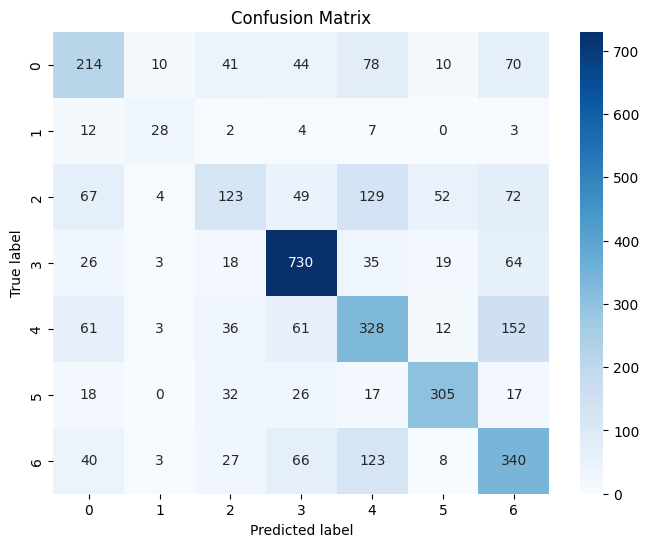

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have trained your model and obtained predictions on test data
# Replace these with your actual predictions and true labels
y_pred = np.argmax(model.predict(X_test), axis=1)

y_true = np.argmax(test_y, axis=1)  # Convert one-hot encoded true labels back to categorical

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

#**📚10-Testing**[2]

1/1 [==============================] - 0s 18ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


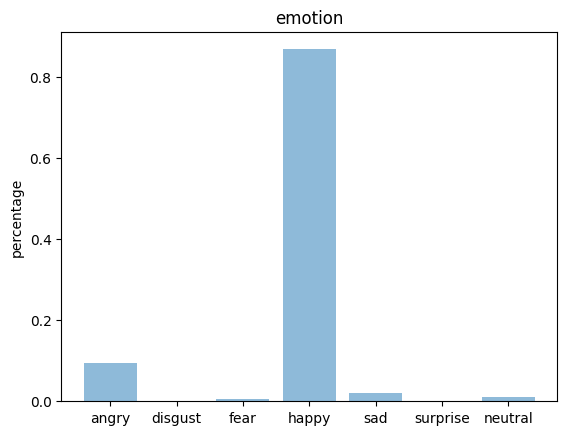

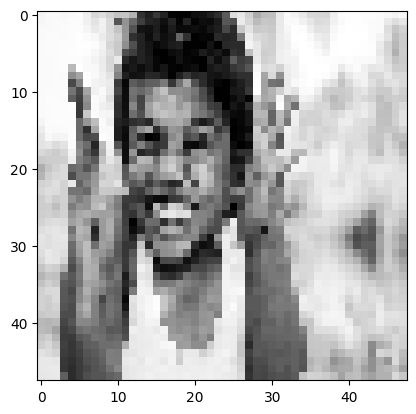

In [37]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from matplotlib import pyplot as plt
img = image.load_img("/content/gdrive/MyDrive/Datasets (1)/Emotion Detection/a.jpg", grayscale=True, target_size=(48, 48))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x /= 255
custom = model.predict(x)
emotion_analysis(custom[0])
x = np.array(x, 'float32')
x = x.reshape([48, 48]);
plt.gray()
plt.imshow(x)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Emotions stored as numerical as labeled from 0 to 6. Keras would produce an output array including these 7 different emotion scores. We can visualize each prediction as bar chart.

In [36]:
def emotion_analysis(emotions):
  objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
  y_pos = np.arange(len(objects))
  plt.bar(y_pos, emotions, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('percentage')
  plt.title('emotion')
  plt.show()

#**📚11-Detecting Real-Time Emotion**

In [38]:
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image

# Load model
model = model_from_json(open("fer.json", "r").read())
model.load_weights('fer.h5')
face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(0)

while True:
    ret, test_img = cap.read()  # captures frame and returns boolean value and captured image
    if not ret:
        print("Error: Unable to capture frame from the webcam.")
        break

    gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)

    for (x, y, w, h) in faces_detected:
        cv2.rectangle(test_img, (x, y), (x + w, y + h), (255, 0, 0), thickness=7)
        roi_gray = gray_img[y:y + w, x:x + h]  # cropping region of interest i.e. face area from  image
        roi_gray = cv2.resize(roi_gray, (48, 48))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis=0)
        img_pixels /= 255

        predictions = model.predict(img_pixels)

        # find max indexed array
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial emotion analysis ', resized_img)

    if cv2.waitKey(10) == ord('q'):  # wait until 'q' key is pressed
        break

cap.release()
cv2.destroyAllWindows()


Error: Unable to capture frame from the webcam.


**📚References:**

[1] Building a Real Time Emotion Detection with Python

https://morioh.com/p/801c509dda99?f=5c21f93bc16e2556b555ab2f

[2] Facial Expression Recognition with Keras
http://sefiks.com/2018/01/01/facial-expression-recognition-with-keras/

[3] Machine Learning Project | Facial Emotion Detection | part 2 Creating Webapp using Flask

https://www.youtube.com/watch?v=2mN7ygkc2XU&feature=youtu.be&fbclid=IwAR35sBAYwEakprFrmi12-4wW_54COtb8hcXdEdlCJjQ_en2JCi4zRA28bSs

